## COMMENT : See if we first give them a link to another notebook to see how to start the server, interface, controller ... and test if it works. Maybe add this is the first section of the troubleshooting ... 

# Practical session 1: First steps with the simulator

If you haven't done it yet, first make a copy of this document on which you will work. To do so, use `File -> Make a copy`. This will open a new tab with a copy of this document. Rename it by clicking on the document title `session_1-Copy1` at the top of the document and enter the new name `YourName_session_1` (if you are in a group of several students, please indicate all names). Close the previous tab with the original document to prevent messing up with the two versions. Important note if you are working from a university computer: it is well possible that the files you store on the computer are not persistent across sessions, which means that if you log out, all the files you have stored will most likely have disappeared next time you will log in. In that case, please systematically save your work either on a USB stick or by sending it to your own email address before logging out. Typically, the file you want to save will be the current document, which is located in `Documents/vivarium/notebooks/sessions`.

In the [`quickstart_tutorial`](../tutorials/quickstart_tutorial.ipynb), we saw how to control the simulator using a Jupyter Notebook. Now, we will see how to make the agents move and implement basic behaviors.

First, we will start by importing the necessary modules and creating the environment like in the other Notebook :

In [1]:
from vivarium.controllers.notebook_controller import NotebookController
from vivarium.utils.handle_server_interface import start_server_and_interface, stop_server_and_interface

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Execute the following cell to start the simulator and the interfac, and click on the link to open the interface.

In [2]:
start_server_and_interface(scene_name="session_1")

/home/cleger/Desktop/code/vivarium/vivarium/utils

STARTING SERVER


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[2024-12-03 19:41:28,545][__main__][INFO] - Scene running: session_1
[2024-12-03 19:41:30,737][vivarium.simulator.simulator][INFO] - Simulator initialized

STARTING INTERFACE


2024-12-03 19:41:33,926 Starting Bokeh server version 3.3.4 (running on Tornado 6.4)
2024-12-03 19:41:33,926 User authentication hooks NOT provided (default user enabled)
2024-12-03 19:41:33,927 Bokeh app running at: http://localhost:5006/run_interface
2024-12-03 19:41:33,928 Starting Bokeh server with process id: 34651
2024-12-03 19:41:36,541 An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
2024-12-03 19:41:38,212 WebSocket connection opened
2024-12-03 19:41:38,224 ServerConnection created


When you click on the link, a new tab will open in your browser. You can then come back to this notebook to continue the exercises. Your interface should look like this:

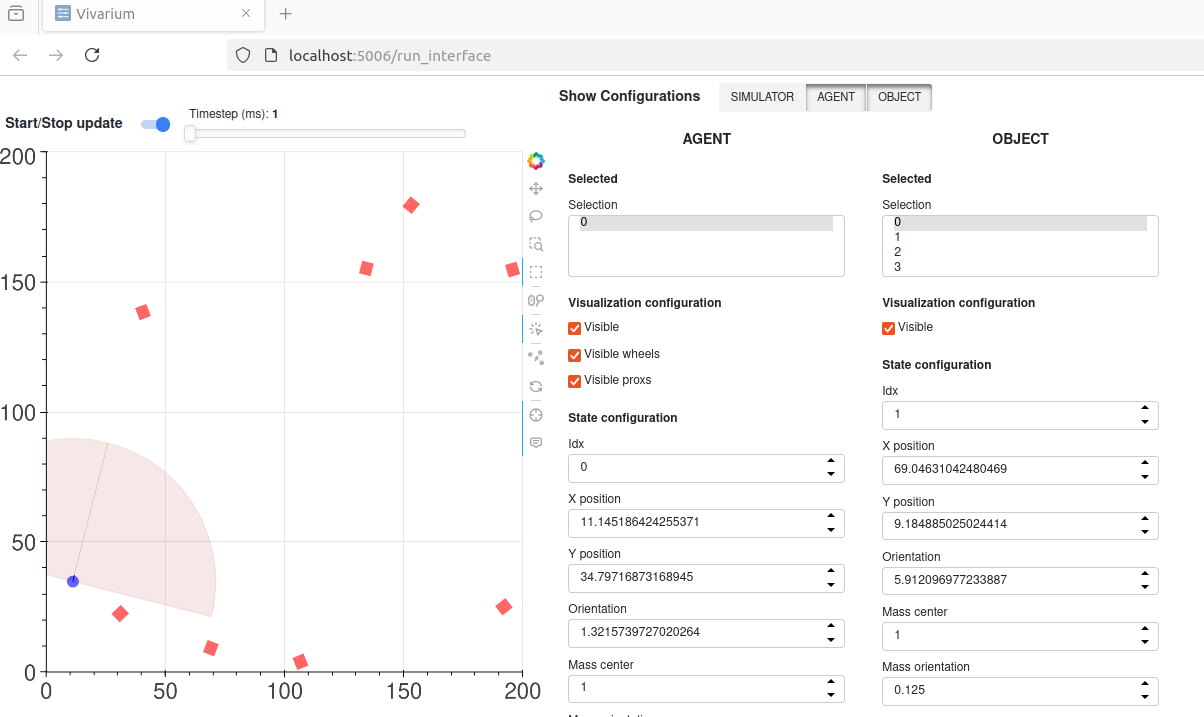


The blue circle is an agent, the half-circle is the field of view of the agent, and the red squares are randomly placed objects. We are going to start interacting with this environment. To do so, we will use the `controller` object. This object is the interface between the simulator and the Python code. It allows us to control the agents and the environment.

Let's instantiate a `controller` object. This whole process will be done at the start of every notebook from now on.

In [3]:
controller = NotebookController()

/home/cleger/Desktop/code/vivarium/venv/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


This time, only one agent should be present. We can check this with this instruction:

In [4]:
controller.agents

Next, we start the controller with the following instruction:

In [5]:
controller.run()

Simulator is already stopped


Nothing should move for now, this is normal as the agents have all their motors stopped.

It can be the case that at one point during the session, the connection is lost and consequently you can't control the robot anymore. If you experience this problem, follow the steps below. First, stop the simulator:

In [6]:
controller.stop()

Then restart this notebook by selecting Kernel -> Restart in the menu bar, and re-open the session by executing:

In [7]:
from vivarium.controllers.notebook_controller import NotebookController
controller = NotebookController()

Then restart the simulation

In [8]:
controller.run()

### Making the agents move

You should now know how to set the attributes of agents (see [the quickstart tutorial](https://github.com/clement-moulin-frier/vivarium/blob/main/notebooks/quickstart_tutorial.ipynb)). For this time, as there is only one agent, we can create a shortcut for the next cells of code:

In [9]:
agent = controller.agents[0]

You can print infos about the agent with the following command:

In [13]:
agent.print_infos()

Entity Overview:
--------------------
Type: AGENT
Subtype: agents
Idx: 0
Exists: True
Position: x=11.15, y=34.80
Diameter: 10.00
Color: #ffa500

Sensors: Left=0.00, Right=-0.00
Motors: Left=0.00, Right=0.00



As in the precedent session, we will modify the agent diameter and color, and print its infos :

In [10]:
agent.diameter = 10.

In [11]:
agent.color = 'orange'

The visual of the agent should have changed in real time in the interface. You can also check the agent's diameter and color with the function we used before.

In [12]:
agent.print_infos()

Entity Overview:
--------------------
Type: AGENT
Subtype: agents
Idx: 0
Exists: True
Position: x=11.15, y=34.80
Diameter: 10.00
Color: #ffa500

Sensors: Left=0.00, Right=-0.00
Motors: Left=0.00, Right=0.00



Now, the variable `agent` refers to the first (and only) agent of the simulation. You can simply write `agent` instead of `controller.agents[0]` for the next instructions.

**Q1:** What is the condition for the agent to turn left? to turn right? to move straight forward? to stop?

*This is a cell where you can write text instead of code.* Double click on this text and enter your answer here. Once it is done, press `Shift-Enter`.

**Q2:** How can you make the agent move forward without any rotation? Write the corresponding code in the cell below. 

In [14]:
agent.left_motor = agent.right_motor = 0.5

**Q3:** Now write the code making the agent stop:

In [15]:
agent.left_motor = agent.right_motor = 0.0

**Q4:** And the code to make it move in a large circle:

In [16]:
agent.left_motor = 0.95
agent.right_motor = 1.

Let's try more complex choregraphies. A useful function for this is the ability to wait for a given time by using `controller.wait(x)`, where `x` has to be replaced by the time to wait for, in seconds. Here is an example, where the agent goes forward during 3 seconds, then turns right during 0.5 second, then goes forward again during 2 seconds, and finally stops.

In [18]:
# Move forward, by setting each wheel speed at the same positive value
agent.left_motor = 1.
agent.right_motor = 1.

# Wait for 3 seconds, keeping moving forward at the same speed
controller.wait(3)

# Turn right by setting a positive speed to the left wheel and stoping the right one (null speed)
agent.left_motor = 0.5
agent.right_motor = 0.

# Keep turning for 0.5 second
controller.wait(0.5)

# Move forward again for 3 seconds
agent.left_motor = 1.
agent.right_motor = 1.
controller.wait(3)

# Stop the agent
agent.left_motor = 0.
agent.right_motor = 0.

A few important remarks regarding the code above:
- each line beginning with a `#` symbol corresponds to a comment and will therefore not be executed (it is just to explain verbally what the code does),
- when calling `controller.wait(.)`, the cell that is currently running will simply wait for the given time in seconds before executing the next line of code. this also means that you cannot execute anything else before the wait time is over.

Now, let's repeat the previous choreography 4 times. In the code below, the first line, `for i in range(4):`, means *repeat 4 times the indented code below* (actually it is a bit more complicated than this, but this out of the scope of the current session).  The indented code is the exact same as just before (only the comments have been removed). You can change the number `4` in the first line by any number `x`, to repeat it `x` times instead of 4.

In [ ]:
for i in range(4):
    # go foward for 3 seconds
    agent.left_motor = 1.
    agent.right_motor = 1.
    controller.wait(3)
    # turn right for 0.5 seconds
    agent.left_motor = 1.
    agent.right_motor = 0.
    controller.wait(0.5)
    # go foward for 3 seconds
    agent.left_motor = 1.
    agent.right_motor = 1.
    controller.wait(3)
    # stop
    agent.left_motor = 0.
    agent.right_motor = 0.

**Q5:** By executing the code just above, you will observe that the agent actually only stops at the very end of the choreography, but not between each run of the loop. Copy-paste the code of the last cell above in the cell below and add one line of code so that the agent will stop for 1 second at each run of the loop.

**Q6:** Write the code allowing the agent to move roughly in a "8" shape. To do so you'll have to fine tune the waiting times by trial on error. Then make the agent repeat it 6 times.

### Sensors

As shown in [the quickstart tutorial](https://github.com/clement-moulin-frier/vivarium/blob/main/notebooks/quickstart_tutorial.ipynb), the agents are equipped with proximity sensors, called proximeters that indicate the presence of an entity, if any, in a particular direction. There are two sensor, one on each side of the agent, that detects entities in a hemi-field shown in red in the interface.

Using the commands learned before, move the front of the robot close to an object in the scene and stop it. Alternatively, you can simply move the agent using drag&drop (see the [`web_interface_tutorial.md`](https://github.com/clement-moulin-frier/vivarium/blob/main/notebooks/web_interface_tutorial.md)).

Whenever a proximeter detects an obstacle, a red point is shown on the agent (if the `visible proxs` checkbox is enabled). The opacity of the point depends on the activation of the sensor, so it can be hard to see if the entity is far away. Note that each proximeter detects only the closest object within its own field of view (indicate by the red lines). The current activation of the two front proximeters can be accessed with:

In [17]:
agent.sensors()

[0.0, -0.0]

This command returns an `list` of values. Here we see two: the first one corresponds to the activity of the left proximeter, the second to the activity of the right one. Those values do NOT correspond to distances, but are instead activation values bounded between 0 and 1, where 0 indicates that no obstacle is perceived (i.e. the proximeter doesn't detect any object withing its field of view), and 1 indicates that an object is in contact with the proximeter. In other word, the higher the activation, the closer the object (inversely proportional to the object distance). 

Make sure that you are able to identify which sensor corresponds to which value. 

You can store the values returned by `agent.sensors()` in two distinct variables, which will facilitate using them for further computation. If you execute the following command:

In [18]:
left, right = agent.sensors()

Then the variables `left` and `right` will contain the activations of the left and right proximeters, respectively. You can check their values using the `print` instruction:

In [19]:
print(left)

0.0


In [20]:
print(right)

0.36141592264175415


**However**, the values in `left` and `right` will not be updated if the proximeter activations change over time. To experience it, move the robot in a different location in the scene where the proximeter activations should be different, and re-execute the `print` commands above. You will observe that the returned values are the same as before, whereas the proximeter activities should be different. In order to refresh the values in the `left` and `right` variables, you need to re-execute the command `left, right = agent.sensors()`:

In [24]:
left, right = agent.sensors()
print(left, right)

0.0 0.38617420196533203


In [25]:
left, right = agent.sensors()
print(left, right)

0.0 0.38617420196533203


Now you see that the values have been updated correctly.

**Q7:** To complete this session, write a behavior that connects sensors to motors, so that the robot goes forward at a speed that depends on the maximum activity of both proximity sensors. The closer the robot is from an obstacle, the slower it should go (but always going forward, without rotation). Remember that proximeter values have to be refreshed explicitly each time we need to observe them by calling `left, right = agent.sensors()` To do so, use the `for` loop construction we have seen, this time with a large number of iterations. Therefore, the code structure of this behavior will look like:

## COMMENT --> Should we ask them to set a minimal speed ? This would avoid the robot to stop when the sensors are activated, and would make the behavior more interesting. + can introduce the concept of min / max in python (but need to explain them some concepts)

In [25]:
# we add a minimal motor value to avoid the robot stopping when the proximeter values are zero
min_slow = 0.1

# Repeat 200 times:
for i in range(200):
    # Print the iteration number every 20 iterations
    if i % 20 == 0:
        print(f"Iteration {i}")

    # Read the proximeter values and store them in the left and right variables
    left, right = agent.sensors()
    prox_slow = min(left, right)

    # Write your code below, which has to set the wheel speeds according to the max of left and right
    # Remember to keep your code indented, otherwise it will not be considered as part of the for loop
    # Also remember that the motor values should be between 0 and 1
    
    #### Line added
    motor_slow = max(prox_slow, min_slow)
    motor_val = 1 - motor_slow
    
    agent.left_motor = agent.right_motor = motor_val
    
    # Keep the line below at the end of the loop. It waits for 100 milliseconds before starting the next iteration (to avoid overloading you computer)
    controller.wait(0.1)

# Stop the agent at the end of the loop
agent.left_motor = agent.right_motor = 0.

Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180


The code above will take a while to be executed (approximately `200 * 0.1 = 20` seconds). During this time, you can't execute anything else in this notebook. To stop the execution before it terminates by itself, press the "stop-like" button in the top menu bar of this document. 

In the next practical session, we will see more fancy ways of defining reactive behaviours for the robot. And in the next ones, still more and more fancy stuffs.
You can now close the simulator session by executing:

In [26]:
controller.stop()
stop_server_and_interface()

 Found the process scripts/run_interface.py running with this PID: 34651


 Found the process scripts/run_server.py running with this PID: 34408


Simulator is already stopped



Stopping server and interface processes



Killed process with PID: 34651
Killed process with PID: 34408

Server and Interface processes have been stopped



Received signal 15, shutting down


False

Now that you finished session 1, you can now jump to the notebook of [session 2](session_2.ipynb).